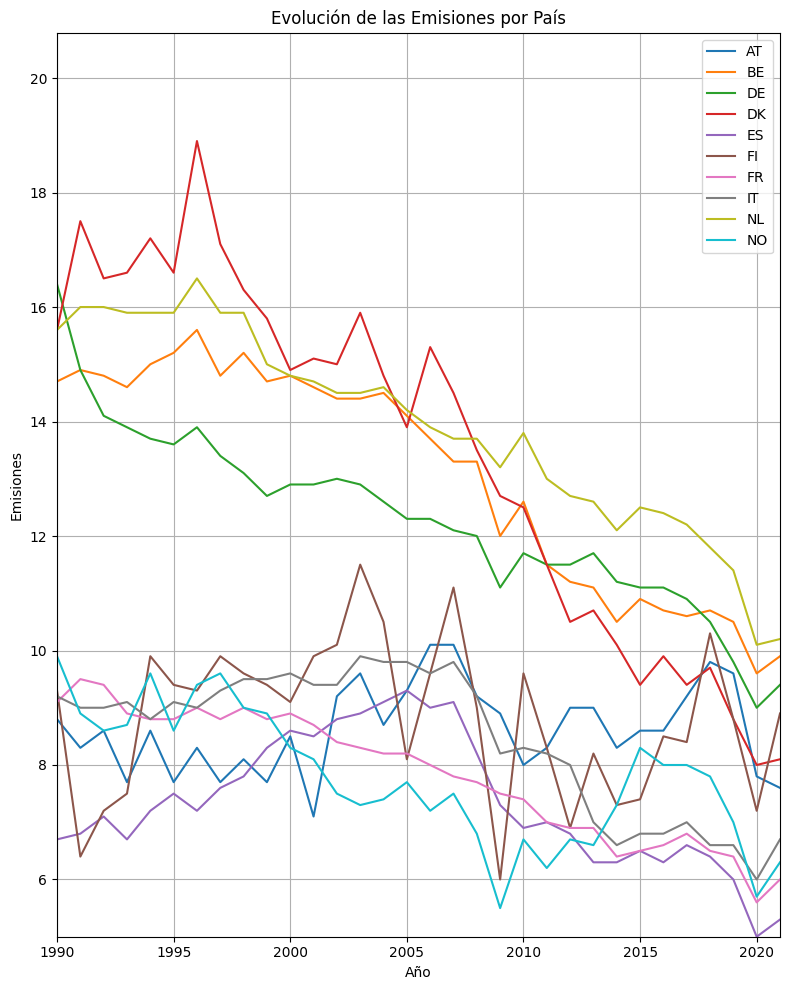

In [14]:
from eurostatapiclient import EurostatAPIClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuración del cliente Eurostat
VERSION = '1.0'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

# Obtener el conjunto de datos de la base de datos 'sdg_13_10'
dataset = client.get_dataset('sdg_13_10')
dataframe = dataset.to_dataframe()

# Asegurar que 'time' y 'values' sean numéricos
dataframe['time'] = pd.to_numeric(dataframe['time'])
dataframe['values'] = pd.to_numeric(dataframe['values'])


filas_a_eliminar = dataframe[dataframe['unit']=='I90']

# Eliminar las filas seleccionadas del DataFrame
df_filtrado = dataframe.drop(filas_a_eliminar.index)
filas_a_eliminar = df_filtrado[df_filtrado['src_crf']=='TOTX4_MEMONIA']

# Eliminar las filas seleccionadas del DataFrame
df_filtrado2 = df_filtrado.drop(filas_a_eliminar.index)

# Ordenar el DataFrame por 'time'
paises_individuales = ['BE', 'DK', 'DE', 'ES', 'FR',
                       'IT', 'NL', 'AT', 'FI', 'NO']

# Filtrar el DataFrame para incluir solo los países individuales
df_paises_individuales = df_filtrado2[df_filtrado2['geo'].isin(paises_individuales)]

plt.figure(figsize=(8, 10))  # Ajusta el tamaño de la figura según tus preferencias

for pais, datos_pais in df_paises_individuales.groupby('geo'):
    plt.plot(datos_pais['time'], datos_pais['values'], label=pais)

# Personalizar el gráfico
plt.title('Evolución de las Emisiones por País')
plt.xlabel('Año')
plt.ylabel('Emisiones')

# Ajustar límites del eje x para mayor amplitud
plt.xlim(df_paises_individuales['time'].min(), df_paises_individuales['time'].max())  # Ajusta según tus datos

# Ajustar escala del eje Y para más detalle
plt.ylim(df_paises_individuales['values'].min() * 1.0, df_paises_individuales['values'].max() * 1.1)  # Ajusta según tus datos

plt.legend()
plt.grid(True)

# Ajustar la resolución de la figura
plt.tight_layout()

# Mostrar el gráfico
plt.show()


